Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

# Tensorflow for Beginner - MNIST 손글씨 숫자 분류 

- 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
- MNIST는 간단한 컴퓨터 비전 데이터셋입니다. 이는 다음과 같이 손으로 쓰여진 이미지로 구성되어 있습니다.
  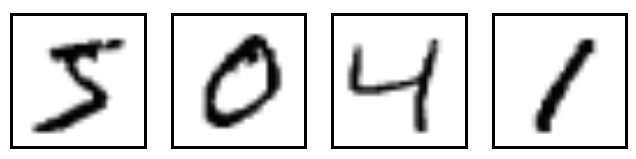

또한, 이것은 그 숫자가 어떤 숫자인지 알려주는 각 이미지에 관한 라벨을 포함하고 있습니다. 예를 들어서, 위의 이미지의 경우에 라벨은 5, 0, 4, 그리고 1입니다.  

이 튜토리얼에서는 모델이 이미지를 보고 어떤 숫자인지 예측하는 모델을 훈련시킬 것입니다. 우리의 목적은 가장 최신의 성능을 발휘하는 정교한 시스템을 만드는 것이 아닙니다.(물론 뒤에 가서 하게될 것입니다!) 대신에, 여기서는 텐서플로우에 발을 살짝만 담궈봅시다. 우리는 소프트맥스 회귀라고 불리는 아주 간단한 모델로 시작할 것입니다.  

이 튜토리얼에 쓰이는 실제 코드는 매우 짧고, 흥미로운 일들은 단지 세 줄 안에 모두 일어납니다. 그러나 우리에게는 그 세 줄 안에 담겨있는 텐서플로우의 동작 원리와 머신러닝의 핵심 개념을 아는 것이 중요합니다. 때문에, 우리는 코드를 하나하나 주의 깊게 다룰 것입니다.   

```
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253 253 207   2   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253 250 182   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201  78   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
```

MNIST 데이터셋은 위 그림과 같이 0에서 9까지 10가지로 분류될 수 있는 손글씨 숫자 이미지 70,000개로 이루어져 있습니다.  
각 이미지는 28×28 픽셀로 구성되고 각 픽셀은 아래와 같이 0~255 사이의 숫자 행렬로 표현됩니다.  
이러한 60,000개의 이미지는 인공 신경망의 훈련 (Training)에 사용되고, 10,000개의 이미지는 테스트 (Test)에 사용됩니다.  
Dense 층들로 구성되는 완전 연결된 인공신경망 (Fully-Connected Neural Network)을 이용해서 MNIST 데이터셋을 분류해 보겠습니다.  

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />깃허브(GitHub) 소스 보기</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## 라이브러리 로드 tensorflow 2.2 ~ 

In [13]:
import tensorflow as tf

## 데이터 셋 load

- [MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 
- 샘플 값을 정수에서 부동소수로 변환합니다:
- 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
- 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
- one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train / 255.0, x_test / 255.0

- 0 ~ 255.0 사이의 값을 갖는 픽셀값들을 0~1.0 사이의 값을 갖도록 변환합니다.

In [15]:
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


- tensorflow에서 직접 MNIST 손글씨 이미지 데이터셋을 불러와서 사용합니다.

- load_data() 함수는 x_train, y_train, x_test, y_test 네 개의 NumPy 어레이를 반환합니다.

- x_train, x_test는 28×28 픽셀의 각 손글씨 이미지 데이터이고, y_train, y_test는 분류에 사용되는 0~9 사이의 레이블 값을 갖습니다.

## 모델 구성

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- tf.keras.models.Sequential()을 이용해서 인공신경망 모델을 구성합니다.
- 입력층 (Input layer)에서 Flatten()을 이용해서 28×28 픽셀의 값을 784개의 1차원 배열로 변환합니다.
- 다음 두 개의 뉴런 층 (Neuron layer)은 Dense()를 이용해서 완전 연결된 층 (Fully-connected layer)를 구성합니다.
- 각 층은 512개와 10개의 인공 뉴런 노드를 갖고 활성화 함수 (activation function)로는 각각 ReLU (tf.nn.relu)와 소프트맥스 (tf.nn.softmax)를 사용합니다.

모델 컴파일
- 학습 과정에서 손실 함수 (Loss function)를 줄이기 위해 사용되는 optimizer로는 Adam (Adaptive Momentum estimation)을 사용합니다.

- 손실 함수는 ‘sparse_categorical_crossentropy’를 지정하고, 평가 지표로는 정확도 (accuracy)를 사용합니다.

- 정확도는 테스트 이미지 중 올바르게 분류한 비율을 의미합니다.

## 모델 훈련

모델을 훈련하고 평가합니다:

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3025 - accuracy: 0.9119
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1471 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1107 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0909 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0771 - accuracy: 0.9759


- model.fit() 메서드에 학습 데이터와, 레이블, 에포크를 순서대로 입력하면, 학습이 이루어집니다.

- 에포크(epoch)는 60,000개의 전체 학습 데이터를 몇 번 반복해서 학습할지를 의미합니다.

### 모델 평가

훈련된 이미지 분류기는 이 데이터셋에서 약 98%의 정확도를 달성합니다. 더 자세한 내용은 [TensorFlow 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9755


- model.evaluate()를 이용해서 10,000개의 테스트 샘플에 대해 손실 (loss)과 정확도 (accuracy)를 평가합니다.
- 결과는 아래와 같습니다.

In [21]:
print('테스트 정확도:', test_acc)

테스트 정확도: 0.9754999876022339


- 간단한 인공신경망과 다섯 번 에포크의 학습만으로 97.55%의 정확도로 MNIST 이미지를 분류할 수 있음을 알 수 있습니다